# Plotly: Airline Dataset
#### Analyzing the Reporting Carrier On-Time Performance Dataset to deduce useful insights with Plotly

Importing our libraries and data:

In [54]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [2]:
airline_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [4]:
airline_data.shape # 27k entries, 110 cols

(27000, 110)

Let's randomdly select 500 data points:

In [14]:
data = airline_data.sample(n=500, random_state=42)
data.reset_index(inplace=True)
data.drop(['index'],axis=1, inplace=True)
data.shape

(500, 110)

##### Let's visually capture details such as:
1. Departure time changes with respect to airport distance.

2. Average Flight Delay time over the months

3.  Comparing number of flights in each destination state

4.  Distribution of arrival delay

5.  Number of flights as per reporting airline

6.  Hierarchical view in othe order of month and destination state holding value of number of flights

### 1. Departure Time changes with respect to airport distance.

For this illustration, we will we using a scatter plot:

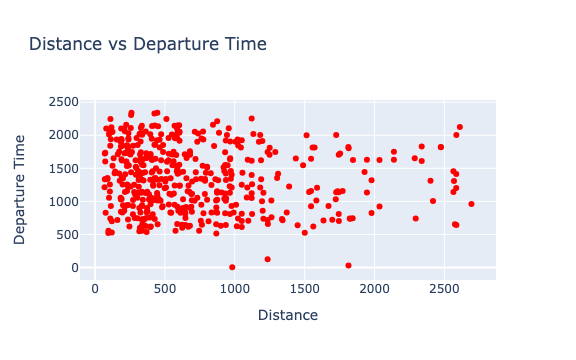

In [36]:
# selecting our data
dis = data['Distance']
dep = data['DepTime'] #2400 format 

# creating empty figure
fig = go.Figure()
# defining our plot
fig.add_trace(go.Scatter(x=dis,
                         y=dep,
                         mode='markers',
                         marker=dict(color='red')))
# setting titles
fig.update_layout(title='Distance vs Departure Time',
                 xaxis_title='Distance',
                 yaxis_title='Departure Time')
fig.show()

__Inferences__</br>
We can infer that there are more flights available throughout the day for shorter distances.

### 2. Average Flight Delay time over the months

For this illustration, we will be using a line plot:

In [42]:
# group data by month, get avg delay time per month
line_data = data.groupby('Month')['ArrDelay'].mean().reset_index()

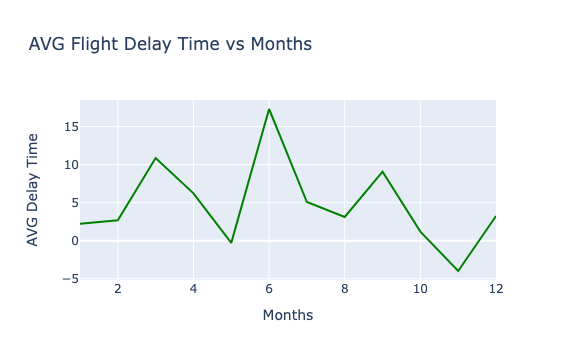

In [45]:
# init empty figure
fig = go.Figure()

# defining plot
fig.add_trace(go.Scatter(x=line_data['Month'],
                         y=line_data['ArrDelay'],
                         mode='lines',
                         marker=dict(color='green')))
# setting labels
fig.update_layout(title='AVG Flight Delay Time vs Months',
                 xaxis_title='Months',
                 yaxis_title='AVG Delay Time')
fig.show()

__Inferences__</br>
From our plot, we can see that June has the highest average delay time.

### 3. Comparing number of flights in each destination state

For this illustration, we will be using a bar chart:

In [47]:
# group data by destination state, get total num of flights per state
bar_data = data.groupby(['DestState'])['Flights'].sum().reset_index()
bar_data.head()

,DestState,Flights
0,AK,4.0
1,AL,3.0
2,AZ,8.0
3,CA,68.0
4,CO,20.0


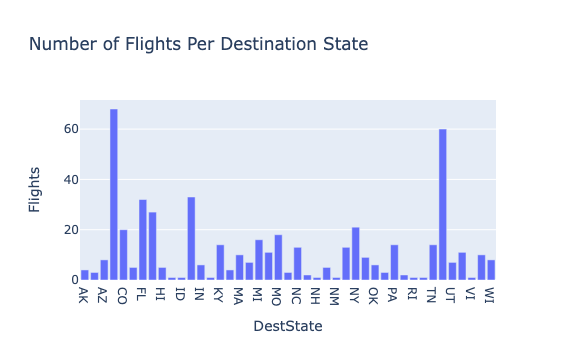

In [50]:
fig = px.bar(bar_data,
             x='DestState',
             y='Flights',
             title='Number of Flights Per Destination State')
fig.show()

__Inferences:__</br>
The state with the most destination flights is __CA__.

### 4. Distribution of arrival delays
For this illustration, we will be using a histogram.

In [59]:
# dealing with missing values, setting NaN to 0
data['ArrDelay'] = data['ArrDelay'].fillna(0)

0    32.0
1    -1.0
2    -5.0
3    -2.0
4   -11.0
Name: ArrDelay, dtype: float64

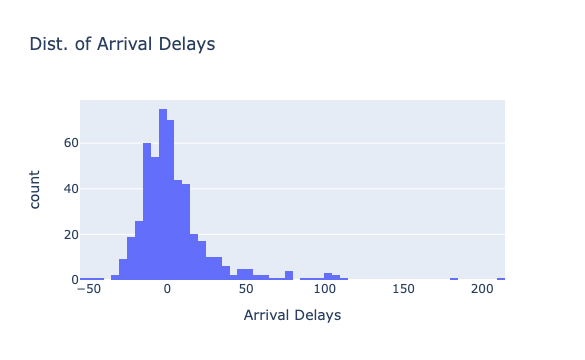

In [58]:
fig = px.histogram(x=data['ArrDelay'],
                   labels={'x':'Arrival Delays'},
                   title='Dist. of Arrival Delays')
fig.show()

__Inference__:</br>
We can see most arrivals are between 15 minutes early to 5 minutes late.

### 5. Number of flights as per reporting airline
For this illustration, we will use a bubble plot:

In [60]:
# group data by airline, get num of flights per airline
bub_data = data.groupby('Reporting_Airline')['Flights'].sum().reset_index()
bub_data.head()

,Reporting_Airline,Flights
0,9E,5.0
1,AA,57.0
2,AS,14.0
3,B6,10.0
4,CO,12.0


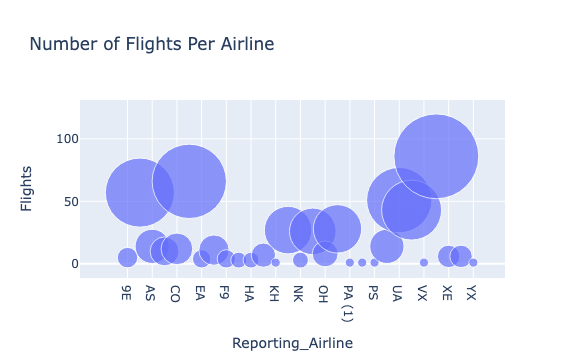

In [62]:
fig = px.scatter(bub_data,
                x='Reporting_Airline',
                y='Flights',
                size='Flights',
                hover_name='Reporting_Airline',
                title='Number of Flights Per Airline',
                size_max=60)
fig.show()

__Inferences__:</br>
We can see that airline __WN__ has the most reported flights in this dataset, about 86.

### 6. Hierarchical view in order of month and destination state holding value of number of flights

For this illustration, we will use a sunburst chart:

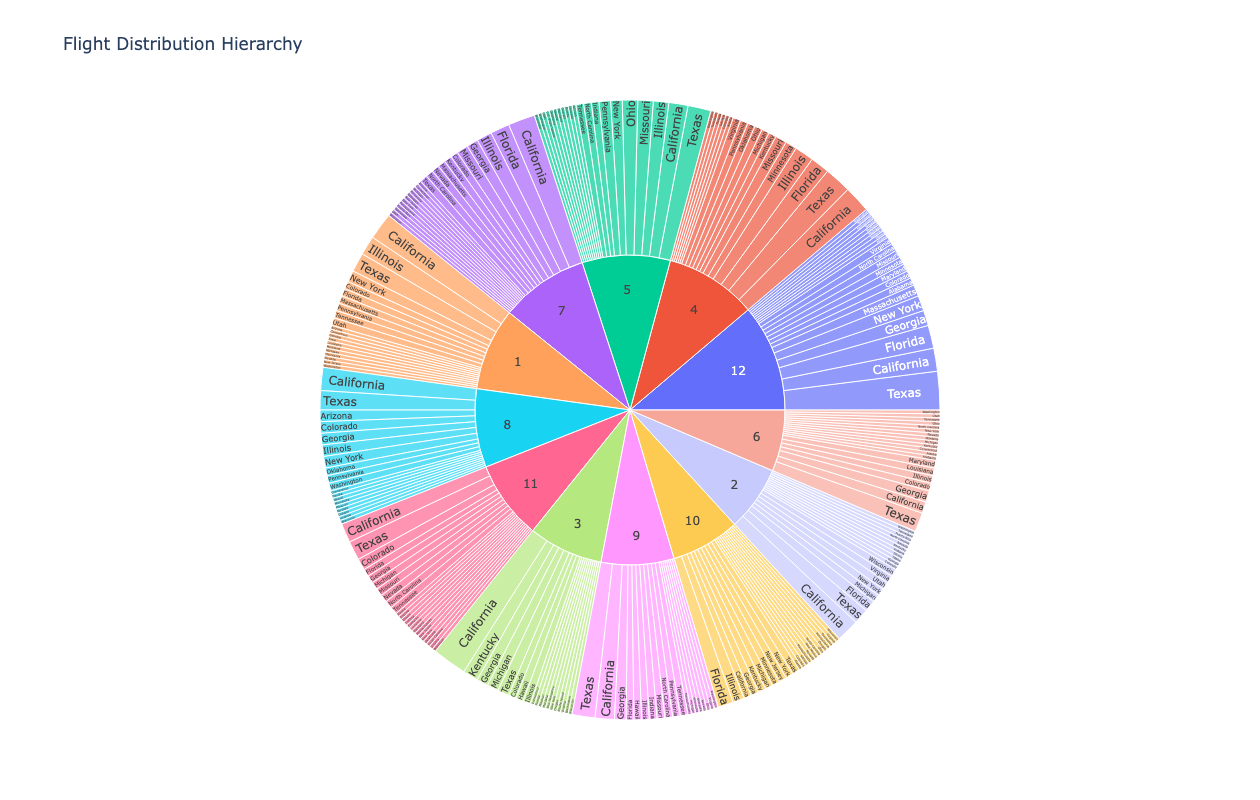

In [65]:
fig = px.sunburst(data,
                 path=['Month','DestStateName'],
                 values='Flights',
                 title='Flight Distribution Hierarchy',
                 width=800,
                 height=800)
fig.show()